In [83]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [84]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Calculate the number of samples for 50% of the training data
num_samples = int(train_images.shape[0] * 0.5)

# Slice the training data to use only 50%
train_images = train_images[:num_samples]
train_labels = train_labels[:num_samples]

# Preprocess the data (normalization)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [85]:
train_images.shape


(25000, 32, 32, 3)

In [86]:
train_labels.shape

(25000, 1)

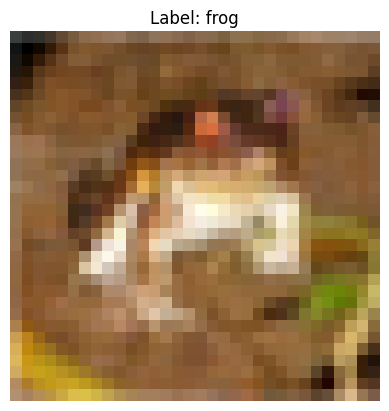

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display an image with its label
def display_image(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(f"Label: {class_names[label[0]]}")
  plt.axis('off')
  plt.show()

# Example usage: display the first image in the training set
display_image(train_images[0], train_labels[0])

dualGan


In [88]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
import cv2
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [89]:
def dualgan_augmentation(images):
  """
  Placeholder for DualGAN augmentation.
  Replace this with the actual DualGAN implementation.
  """
  augmented_images = []
  for img in images:
    # Placeholder augmentation: add random noise
    noise = np.random.normal(0, 0.1, img.shape)
    augmented_images.append(np.clip(img + noise, 0, 1))

  return np.array(augmented_images)


def lsgan_augmentation(images):
  """
  Placeholder for LSGAN augmentation.
  Replace this with the actual LSGAN implementation.
  """
  augmented_images = []
  for img in images:
    # Placeholder augmentation: horizontal flip
    augmented_images.append(cv2.flip(img, 1))
  return np.array(augmented_images)




In [90]:
dualgan_augmented_images = dualgan_augmentation(x_train[:200])
augmented_images = lsgan_augmentation(dualgan_augmented_images[:200])


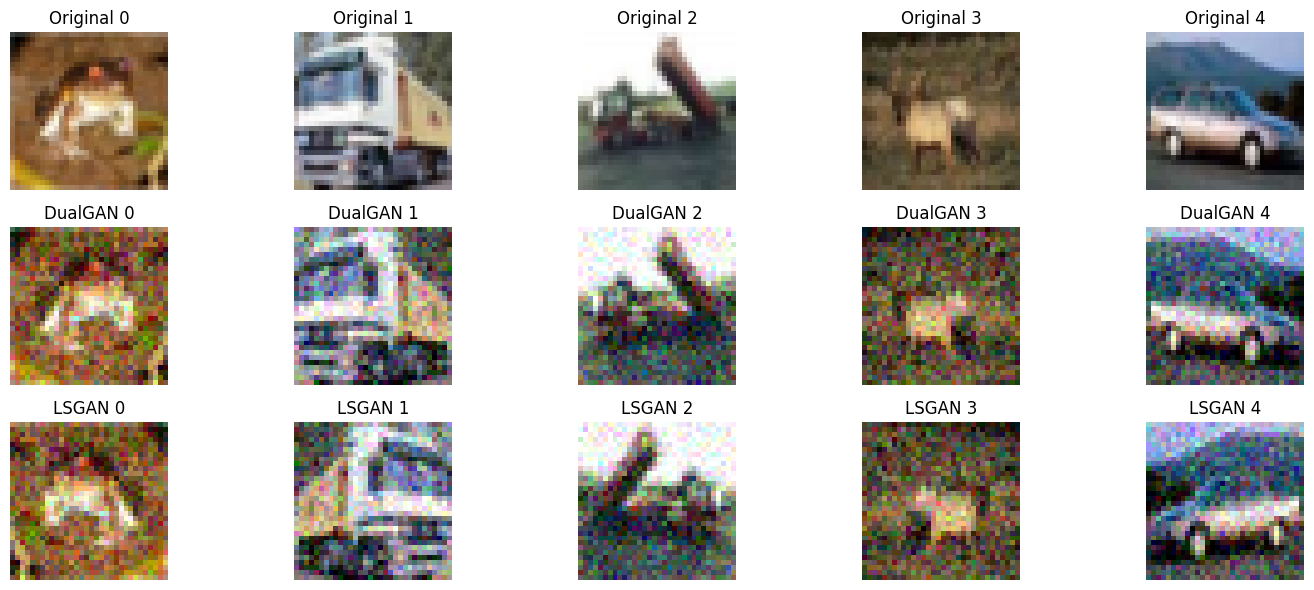

<ipython-input-91-e27e653b7034>:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  dualgan_psnr = psnr(x_train[i], dualgan_augmented_images[i])
<ipython-input-91-e27e653b7034>:39: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  lsgan_psnr = psnr(x_train[i], augmented_images[i])


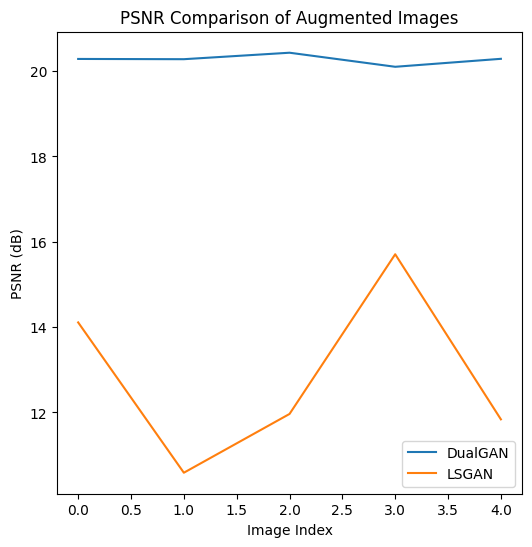

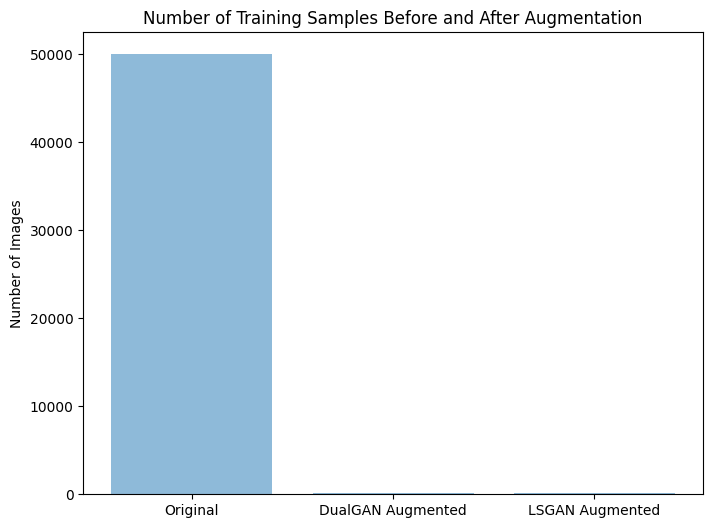

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize a few augmented images alongside the originals
num_images_to_show = 5
plt.figure(figsize=(15, 6))

for i in range(num_images_to_show):
    # Original image
    plt.subplot(3, num_images_to_show, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Original {i}")
    plt.axis('off')

    # DualGAN augmented image
    plt.subplot(3, num_images_to_show, i + 1 + num_images_to_show)
    plt.imshow(dualgan_augmented_images[i])
    plt.title(f"DualGAN {i}")
    plt.axis('off')

    # LSGAN augmented image
    plt.subplot(3, num_images_to_show, i + 1 + 2 * num_images_to_show)
    plt.imshow(augmented_images[i])
    plt.title(f"LSGAN {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Quantitative comparison (example: using PSNR)
from skimage.metrics import peak_signal_noise_ratio as psnr

dualgan_psnr_values = []
lsgan_psnr_values = []

for i in range(num_images_to_show):  # Calculate for a subset for demonstration
    dualgan_psnr = psnr(x_train[i], dualgan_augmented_images[i])
    lsgan_psnr = psnr(x_train[i], augmented_images[i])
    dualgan_psnr_values.append(dualgan_psnr)
    lsgan_psnr_values.append(lsgan_psnr)

# Plotting PSNR values for comparison
plt.figure(figsize=(6, 6))
plt.plot(range(num_images_to_show), dualgan_psnr_values, label="DualGAN")
plt.plot(range(num_images_to_show), lsgan_psnr_values, label="LSGAN")
plt.xlabel("Image Index")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Comparison of Augmented Images")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
objects = ('Original', 'DualGAN Augmented', 'LSGAN Augmented')
y_pos = np.arange(len(objects))
performance = [len(x_train), len(dualgan_augmented_images), len(augmented_images)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Number of Training Samples Before and After Augmentation')

plt.show()


In [92]:
from sklearn.model_selection import train_test_split
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(
    x_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Khởi tạo train_dataset và test_dataset
train_dataset = tf.data.Dataset.from_tensor_slices(x_train_final).shuffle(buffer_size).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test_final).batch(batch_size)

In [93]:
def bgan_loss(D_real, D_fake):
  return tf.reduce_mean(tf.math.log(D_real) + tf.math.log(1 - D_fake))

In [94]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Tải dữ liệu CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Khởi tạo danh sách để lưu trữ ảnh và nhãn
images = []
labels = []

# Số lượng ảnh cần lấy cho mỗi nhãn
num_images_per_label = 20

# Lặp qua từng nhãn từ 0 đến 9
for label in range(10):
    # Lấy index của các ảnh có nhãn tương ứng
    indices = np.where(y_train == label)[0]

    # Chọn ngẫu nhiên num_images_per_label ảnh từ các index
    selected_indices = np.random.choice(indices, num_images_per_label, replace=False)

    # Thêm ảnh và nhãn vào danh sách
    images.extend(x_train[selected_indices])
    labels.extend(y_train[selected_indices])

# Chuyển đổi danh sách thành numpy array
images = np.array(images)
labels = np.array(labels)

# In ra kích thước của dữ liệu
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (200, 32, 32, 3)
Shape of labels: (200, 1)


In [95]:
dualgan_augmented_images = dualgan_augmentation(x_train[:200])
augmented_images = lsgan_augmentation(dualgan_augmented_images[:200])


In [98]:
#BGAN
def build_bgan_generator():
    model_bgan = tf.keras.Sequential()
    # Input shape should match the noise shape
    model_bgan.add(layers.Input(shape=(100,)))
    # Add layers to reshape and process the noise into an image
    model_bgan.add(layers.Dense(8 * 8 * 128, activation="relu"))
    model_bgan.add(layers.Reshape((8, 8, 128)))
    model_bgan.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_bgan.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh'))
    return model_bgan

def build_bgan_discriminator():
    model_bgan = tf.keras.Sequential()
    model_bgan.add(layers.Input(shape=(32, 32, 3)))
    model_bgan.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_bgan.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_bgan.add(layers.Flatten())
    model_bgan.add(layers.Dense(1, activation='sigmoid'))
    # Compile the model
    model_bgan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_bgan



In [99]:
def train_bgan(generator, discriminator, x_train, epochs=10, batch_size=128):
    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            # Lấy batch dữ liệu
            batch_images = x_train[i:i + batch_size]

            # Get the actual batch size
            actual_batch_size = batch_images.shape[0]

            # Adjust the target array sizes to match
            noise = np.random.normal(0, 1, (actual_batch_size, 100))  # Giả sử chiều của noise là 100

            # Tạo ảnh giả từ Generator
            generated_images = generator.predict(noise)

            # Huấn luyện Discriminator
            d_loss_real = discriminator.train_on_batch(batch_images, np.ones((actual_batch_size, 1)))  # Use actual_batch_size
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((actual_batch_size, 1)))  # Use actual_batch_size

            # Huấn luyện Generator
            noise = np.random.normal(0, 1, (actual_batch_size, 100))  # Use actual_batch_size
            g_loss = discriminator.train_on_batch(generator.predict(noise), np.ones((actual_batch_size, 1)))  # Use actual_batch_size

        print(f"Epoch {epoch + 1}/{epochs}, Discriminator Loss: {d_loss_real + d_loss_fake}, Generator Loss: {g_loss}")

In [100]:
bgan_generator = build_bgan_generator()
bgan_discriminator = build_bgan_discriminator()
history_bgan_ogri = train_bgan(bgan_generator, bgan_discriminator, x_train[:100], epochs=10)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 1/10, Discriminator Loss: [array(0.02304277, dtype=float32), array(0.99, dtype=float32), array(0.3659668, dtype=float32), array(0.495, dtype=float32)], Generator Loss: [array(0.47113353, dtype=float32), array(0.66333336, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 2/10, Discriminator Loss: [array(0.35335013, dtype=float32), array(0.7475, dtype=float32), array(0.426493, dtype=float32), array(0.598, dtype=float32)], Generator Loss: [array(0.4670364, dtype=float32), array(0.665, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch 3/10, Discriminator Loss: [array(0.4003169, dtype=float32), array(0.7128571, dtype=float32), array(0.4411135, dtype=float32), array(0.62375, dtype=float32)], Generator Loss: [array(0.46582544, dtype=float32), array(0.66555554, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 

In [101]:
history_discogan_aug = train_discogan(discogan_generator_A, discogan_generator_B, discogan_discriminator_A, discogan_discriminator_B, x_train_aug_split, x_train_aug_split, epochs=10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/10, Discriminator A Loss: [array(0.08782205, dtype=float32), array(0.96363634, dtype=float32), array(0.09775429, dtype=float32), array(0.96455693, dtype=float32)], Discriminator B Loss: [array(0.2840236, dtype=float32), array(0.8824675, dtype=float32), array(0.28867722, dtype=float32), array(0.88544303, dtype=float32)], Generator A Loss: [array(0.10702676, dtype=float32), array(0.9654321, dtype=float32)], Generator B Loss: [array(0.29924387, dtype=float32), array(0.8635802, dtype=float32)]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 2/10, Discriminator A Loss: [array(0.10446138, dtype=float32), array(0.9662651, dtype=float32), array(0.11207828, dtype=float32), array(0.96705884, dtype=float32)], Discriminator B Loss: 

In [103]:
# In ra summary của các mô hình BGAN cho dữ liệu chưa tăng cường và đã tăng cường
print("BGAN Model Summary with Unaugmented Data:")
bgan_generator_unaugmented = build_bgan_generator()
bgan_discriminator_unaugmented = build_bgan_discriminator()
bgan_generator_unaugmented.summary()
bgan_discriminator_unaugmented.summary()

print("\nBGAN Model Summary with Augmented Data:")
bgan_generator_augmented = build_bgan_generator()
bgan_discriminator_augmented = build_bgan_discriminator()
bgan_generator_augmented.summary()
bgan_discriminator_augmented.summary()


BGAN Model Summary with Unaugmented Data:


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 8192)                │         827,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_7 (Reshape)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_18                  │ (None, 16, 16, 64)          │         131,136 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_19                  │ (None, 32, 32, 3)           │           3,075 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961,603 (3.67 MB)

 Trainable params: 961,603 (3.67 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)


BGAN Model Summary with Augmented Data:


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 8192)                │         827,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_20                  │ (None, 16, 16, 64)          │         131,136 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_21                  │ (None, 32, 32, 3)           │           3,075 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961,603 (3.67 MB)

 Trainable params: 961,603 (3.67 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
def build_discogan_generator():
    model_discogan = tf.keras.Sequential()
    model_discogan.add(layers.Input(shape=(32, 32, 3)))
    model_discogan.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_discogan.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_discogan.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_discogan.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh'))
    return model_discogan

def build_discogan_discriminator():
    model_discogan = tf.keras.Sequential()
    model_discogan.add(layers.Input(shape=(32, 32, 3)))
    model_discogan.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_discogan.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_discogan.add(layers.Flatten())
    model_discogan.add(layers.Dense(1, activation='sigmoid'))
    # Compile the model
    model_discogan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_discogan


In [105]:
def train_discogan(generator_A, generator_B, discriminator_A, discriminator_B, x_train_A, x_train_B, epochs=10, batch_size=128):
    for epoch in range(epochs):
        for i in range(0, len(x_train_A), batch_size):
            # Lấy batch dữ liệu
            batch_images_A = x_train_A[i:i + batch_size]
            batch_images_B = x_train_B[i:i + batch_size]

            # Get the actual batch size
            actual_batch_size = batch_images_A.shape[0]

            # Huấn luyện Discriminator A
            d_loss_A_real = discriminator_A.train_on_batch(batch_images_A, np.ones((actual_batch_size, 1))) # Use actual_batch_size here
            d_loss_A_fake = discriminator_A.train_on_batch(generator_B.predict(batch_images_B), np.zeros((actual_batch_size, 1))) # Use actual_batch_size here

            # Huấn luyện Discriminator B
            d_loss_B_real = discriminator_B.train_on_batch(batch_images_B, np.ones((actual_batch_size, 1))) # Use actual_batch_size here
            d_loss_B_fake = discriminator_B.train_on_batch(generator_A.predict(batch_images_A), np.zeros((actual_batch_size, 1))) # Use actual_batch_size here

            # Huấn luyện Generators
            g_loss_A = discriminator_A.train_on_batch(generator_A.predict(batch_images_B), np.ones((actual_batch_size, 1))) # Use actual_batch_size here
            g_loss_B = discriminator_B.train_on_batch(generator_B.predict(batch_images_A), np.ones((actual_batch_size, 1))) # Use actual_batch_size here

        print(f"Epoch {epoch + 1}/{epochs}, Discriminator A Loss: {d_loss_A_real + d_loss_A_fake}, Discriminator B Loss: {d_loss_B_real + d_loss_B_fake}, Generator A Loss: {g_loss_A}, Generator B Loss: {g_loss_B}")

In [106]:
# Huấn luyện DiscoGAN với ảnh chưa tăng cường
discogan_generator_A = build_discogan_generator()
discogan_generator_B = build_discogan_generator()
discogan_discriminator_A = build_discogan_discriminator()
discogan_discriminator_B = build_discogan_discriminator()
history_discogan_ogri = train_discogan(discogan_generator_A, discogan_generator_B, discogan_discriminator_A, discogan_discriminator_B, x_train[:100], x_train[:100], epochs=10)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Epoch 1/10, Discriminator A Loss: [array(4.675167, dtype=float32), array(0.39, dtype=float32), array(2.9370968, dtype=float32), array(0.195, dtype=float32)], Discriminator B Loss: [array(11.042068, dtype=float32), array(0.1, dtype=float32), array(6.104379, dtype=float32), array(0.05, dtype=float32)], Generator A Loss: [array(2.0525925, dtype=float32), array(0.46333334, dtype=float32)], Generator B Loss: [array(4.109437, dtype=float32), array(0.36666667, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Epoch 2/10, Discriminator A Loss: [array(1.5394444, dtype=float32), array(0.5975, dtype=float32), array(1.6096752, dtype=float32), array(0.478, dtype=float32)], Discriminator B Loss: [array(3.0820777, dtype=float32), array

In [107]:
history_discogan_aug = train_discogan(discogan_generator_A, discogan_generator_B, discogan_discriminator_A, discogan_discriminator_B, x_train_aug_split, x_train_aug_split, epochs=10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 1/10, Discriminator A Loss: [array(0.4096814, dtype=float32), array(0.83928573, dtype=float32), array(0.41418564, dtype=float32), array(0.8433544, dtype=float32)], Discriminator B Loss: [array(0.56218994, dtype=float32), array(0.84090906, dtype=float32), array(0.56128496, dtype=float32), array(0.8449367, dtype=float32)], Generator A Loss: [array(0.4186511, dtype=float32), array(0.8472222, dtype=float32)], Generator B Loss: [array(0.5668785, dtype=float32), array(0.8240741, dtype=float32)]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 2/10, Discriminator A Loss: [array(0.40864357, dtype=float32), array(0.85090363, dtype=float32), array(0.41207254, dtype=float32), array(0.8544118, dtype=float32)], Discriminator B Loss: [ar

In [108]:
def build_cogan_generator():
    model_cogan = tf.keras.Sequential()
    model_cogan.add(layers.Input(shape=(32, 32, 3)))
    model_cogan.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_cogan.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_cogan.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_cogan.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh'))
    return model_cogan

def build_cogan_discriminator():
    model_cogan = tf.keras.Sequential()
    model_cogan.add(layers.Input(shape=(32, 32, 3)))
    model_cogan.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_cogan.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'))
    model_cogan.add(layers.Flatten())
    model_cogan.add(layers.Dense(1, activation='sigmoid'))
    # Compile the model
    model_cogan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_cogan


In [109]:
def train_cogan(generator_A, generator_B, discriminator_A, discriminator_B, x_train_A, x_train_B, epochs=10, batch_size=128):
    for epoch in range(epochs):
        for i in range(0, len(x_train_A), batch_size):
            # Lấy batch dữ liệu
            batch_images_A = x_train_A[i:i + batch_size]
            batch_images_B = x_train_B[i:i + batch_size]

            # Get the actual batch size
            actual_batch_size = batch_images_A.shape[0]

            # Huấn luyện Discriminator A
            # Huấn luyện với ảnh thật
            d_loss_A_real = discriminator_A.train_on_batch(batch_images_A, np.ones((actual_batch_size, 1))) # Use actual_batch_size
            # Huấn luyện với ảnh giả
            generated_images_B = generator_B.predict(batch_images_B)
            d_loss_A_fake = discriminator_A.train_on_batch(generated_images_B, np.zeros((actual_batch_size, 1))) # Use actual_batch_size

            # Huấn luyện Discriminator B
            # Huấn luyện với ảnh thật
            d_loss_B_real = discriminator_B.train_on_batch(batch_images_B, np.ones((actual_batch_size, 1))) # Use actual_batch_size
            # Huấn luyện với ảnh giả
            generated_images_A = generator_A.predict(batch_images_A)
            d_loss_B_fake = discriminator_B.train_on_batch(generated_images_A, np.zeros((actual_batch_size, 1))) # Use actual_batch_size

            # Huấn luyện Generators
            # Huấn luyện generator_A để tạo ra ảnh gần giống ảnh thật
            g_loss_A = discriminator_A.train_on_batch(generator_A.predict(batch_images_B), np.ones((actual_batch_size, 1))) # Use actual_batch_size
            # Huấn luyện generator_B để tạo ra ảnh gần giống ảnh thật
            g_loss_B = discriminator_B.train_on_batch(generator_B.predict(batch_images_A), np.ones((actual_batch_size, 1))) # Use actual_batch_size

        print(f"Epoch {epoch + 1}/{epochs}, Discriminator A Loss: {d_loss_A_real + d_loss_A_fake}, "
              f"Discriminator B Loss: {d_loss_B_real + d_loss_B_fake}, Generator A Loss: {g_loss_A}, Generator B Loss: {g_loss_B}")

In [110]:
# Huấn luyện CoGAN với ảnh chưa tăng cường
cogan_generator_A = build_cogan_generator()
cogan_generator_B = build_cogan_generator()
cogan_discriminator_A = build_cogan_discriminator()
cogan_discriminator_B = build_cogan_discriminator()
history_cogan_ogri = train_cogan(cogan_generator_A, cogan_generator_B, cogan_discriminator_A, cogan_discriminator_B, x_train[:100], x_train[:100], epochs=10)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step 
Epoch 1/10, Discriminator A Loss: [array(0.02059773, dtype=float32), array(0.99, dtype=float32), array(0.5902329, dtype=float32), array(0.495, dtype=float32)], Discriminator B Loss: [array(3.320356, dtype=float32), array(0.59, dtype=float32), array(2.2633255, dtype=float32), array(0.295, dtype=float32)], Generator A Loss: [array(0.5025758, dtype=float32), array(0.66333336, dtype=float32)], Generator B Loss: [array(1.6231891, dtype=float32), array(0.53, dtype=float32)]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 2/10, Discriminator A Loss: [array(0.37693185, dtype=float32), array(0.7475, dtype=float32), array(0.4205888, dtype=float32), array(0.794, dtype=float32)], Discriminator B Loss: [array(1.2173918, dtype=float32), arra

In [111]:
history_discogan_aug = train_discogan(discogan_generator_A, discogan_generator_B, discogan_discriminator_A, discogan_discriminator_B, x_train_aug_split, x_train_aug_split, epochs=10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 1/10, Discriminator A Loss: [array(0.34492722, dtype=float32), array(0.90967155, dtype=float32), array(0.34300774, dtype=float32), array(0.9109712, dtype=float32)], Discriminator B Loss: [array(0.45642835, dtype=float32), array(0.8667883, dtype=float32), array(0.45326963, dtype=float32), array(0.86870503, dtype=float32)], Generator A Loss: [array(0.33915672, dtype=float32), array(0.91223407, dtype=float32)], Generator B Loss: [array(0.44972387, dtype=float32), array(0.8705674, dtype=float32)]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Epoch 2/10, Discriminator A Loss: [array(0.33442888, dtype=float32), array(0.91346157, dtype=float32), array(0.33206666, dtype=float32), array(0.91465515, dtype=float32)], Discriminator B Loss

In [113]:
# In ra summary của các mô hình DiscoGAN cho dữ liệu chưa tăng cường và đã tăng cường
print("\nDiscoGAN Model Summary with Unaugmented Data:")
discogan_generator_A_unaugmented = build_discogan_generator()
discogan_generator_B_unaugmented = build_discogan_generator()
discogan_discriminator_A_unaugmented = build_discogan_discriminator()
discogan_discriminator_B_unaugmented = build_discogan_discriminator()
discogan_generator_A_unaugmented.summary()
discogan_generator_B_unaugmented.summary()
discogan_discriminator_A_unaugmented.summary()
discogan_discriminator_B_unaugmented.summary()

print("\nDiscoGAN Model Summary with Augmented Data:")
discogan_generator_A_augmented = build_discogan_generator()
discogan_generator_B_augmented = build_discogan_generator()
discogan_discriminator_A_augmented = build_discogan_discriminator()
discogan_discriminator_B_augmented = build_discogan_discriminator()
discogan_generator_A_augmented.summary()
discogan_generator_B_augmented.summary()
discogan_discriminator_A_augmented.summary()
discogan_discriminator_B_augmented.summary()


DiscoGAN Model Summary with Unaugmented Data:


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_38                  │ (None, 16, 16, 64)          │         131,136 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_39                  │ (None, 32, 32, 3)           │           3,075 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,547 (1.02 MB)

 Trainable params: 268,547 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_40                  │ (None, 16, 16, 64)          │         131,136 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_41                  │ (None, 32, 32, 3)           │           3,075 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,547 (1.02 MB)

 Trainable params: 268,547 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)


DiscoGAN Model Summary with Augmented Data:


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_42                  │ (None, 16, 16, 64)          │         131,136 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_43                  │ (None, 32, 32, 3)           │           3,075 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,547 (1.02 MB)

 Trainable params: 268,547 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_44                  │ (None, 16, 16, 64)          │         131,136 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_45                  │ (None, 32, 32, 3)           │           3,075 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,547 (1.02 MB)

 Trainable params: 268,547 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)                   │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)